In [1]:
# Linear regression - attempts to model the relationship between two variables by fitting a linear equation to observed data. 
# A linear regression line has an equation of the form Y = a + bX, also known as Y = mX + B, 
# to predict the value of a variable based on the value of another variable.

!pip3 install torch

In [2]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'X')

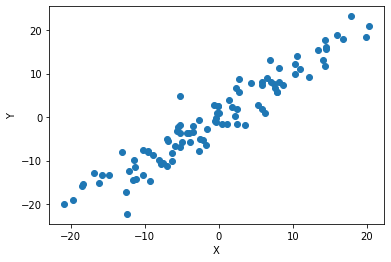

In [3]:
# 
# Create a Dataset of 100 rows and 1 column for our Linear Regression to Use
#

X = torch.randn(100, 1) * 10
Y = X + 3*torch.randn(100,1)      # Y is a function of X, shift it up and down to increase noise
plt.plot( X, Y, 'o')
plt.ylabel('Y')
plt.xlabel('X')

In [4]:
#
# we start with random values for weight and bias paramerters.
# then we train our model through a gradient descent algorithm
# to obtain optimal parameters for the weight and to fit our data.
#

In [5]:
# 
# Linear Regression class below is a sub class we created
# from nn.Module - inheriting all nueral network modules from this parent class
# nn.Module - Base class for all neural network modules - https://pytorch.org/docs/stable/generated/torch.nn.Module.html
# w/ inheritance we call super().__init__():  
# super() gives you access to methods in a superclass from the subclass that inherits from it.
#

class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size ):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

#
# Forward function returns the Y Value for given X, using our nn.linear computation provided by Pytorch
# Applies a linear transformation to the incoming data using the Weight and Bias defined by the model
# 
  def forward(self, x):
    Y_prod = self.linear(x)
    return Y_prod

In [6]:
torch.manual_seed(1)

# Create a Model Instance of the Linear Regression Class
model = LinearRegression(1,1)


In [7]:
[w, b] = model.parameters() # Parameters are returned in a 2D Tensor with 1 Row and 1 Column
def get_params():
  return (w[0][0].item(), b[0].item())

In [8]:
#
# The plot_fit function will print out the graph of all the X and Y datapoints 
# It will grab the weight and bias parameters from the model and multiple times -30 and 30, X points
# which will give us the Line of best fit 

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params() # get the weight and bias values from the model
  x1 = np.array([-30,30])
  print(x1) # array of 2 elements -30 and 30
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, Y)
  plt.show()

[-30  30]


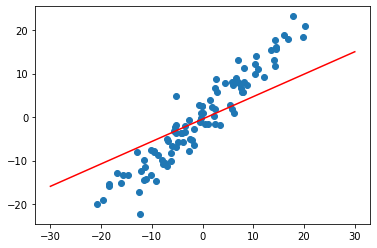

In [9]:
plot_fit('Initial Model')

In [10]:
# 
# Implement Optimization algirith (MSE LOSS) and train model
#
# Loss Function
#
#

criterion = nn.MSELoss()

#will use SGD to update the weights and bias
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# 1 epoch is a single pass through the entire Dataset, we calculate the error function and backpropogate 
# the gradient of the error function to update the weights
epochs = 100
losses = []

# Most Models we TRAIN will follow this similar process
#
# 1. Make predictions using our Model
# 2. Compare the predictions made by the model to the actual outputs
# 3. Based on that
# 4. Determine the Loss Mean Squared
# 5. Then use the SGD to update the weights of our model in the direction of least error
# 6. Thereby minimizing the error function of our model as we attempt to minimize the loss iteratively
#

# we want to minimize the error in each epoch pass
for i in range(epochs):
  y_pred = model.forward(X) # 1. Make predictions using our Model
  loss = criterion(y_pred, Y) # 2. Compare the predictions made by the model to the actual outputs, to determine MSE, Mean squared error
  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss)
  optimizer.zero_grad() # set the gradient to zero, since gradients accumulate following loss.backward() call from previous epoch
  loss.backward()     # take the gradient of the loss function, we use loss.backward() to computer gradient
  optimizer.step()    # we update our model parameters by optimizer.step(), can be called once gradients are computed


epoch:  0 loss:  32.67218780517578
epoch:  1 loss:  26.17715835571289
epoch:  2 loss:  21.490158081054688
epoch:  3 loss:  18.10701560974121
epoch:  4 loss:  15.664220809936523
epoch:  5 loss:  13.899615287780762
epoch:  6 loss:  12.624176025390625
epoch:  7 loss:  11.701576232910156
epoch:  8 loss:  11.03352165222168
epoch:  9 loss:  10.549120903015137
epoch:  10 loss:  10.197261810302734
epoch:  11 loss:  9.94107437133789
epoch:  12 loss:  9.753973007202148
epoch:  13 loss:  9.616781234741211
epoch:  14 loss:  9.515667915344238
epoch:  15 loss:  9.440654754638672
epoch:  16 loss:  9.38454818725586
epoch:  17 loss:  9.342151641845703
epoch:  18 loss:  9.309720993041992
epoch:  19 loss:  9.284546852111816
epoch:  20 loss:  9.26467514038086
epoch:  21 loss:  9.248699188232422
epoch:  22 loss:  9.235591888427734
epoch:  23 loss:  9.22461986541748
epoch:  24 loss:  9.21524429321289
epoch:  25 loss:  9.207077980041504
epoch:  26 loss:  9.19984245300293
epoch:  27 loss:  9.193327903747559
e

Text(0.5, 0, 'Epoch')

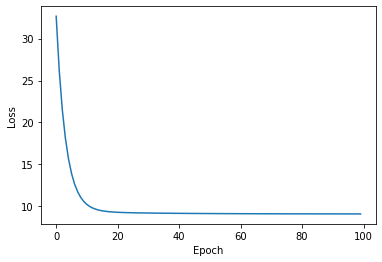

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

[-30  30]


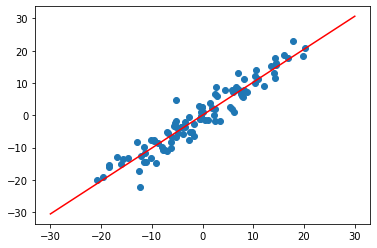

1.0203615427017212
0.08679600805044174


In [12]:
plot_fit('Trained Model')

#final weights and bias
final_weight, final_bias = get_params()
print(final_weight)
print(final_bias)